In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [9]:
#data loading
games = pd.read_csv("./Downloads/games.csv")

In [10]:
print(games.columns)
print(games.shape)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)


In [11]:
print(games.columns)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')


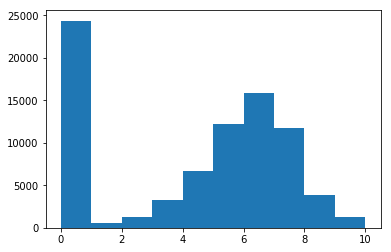

In [12]:
# Making HistoGram of all ratings in average_ratings column
plt.hist(games["average_rating"])
plt.show()

In [13]:
# Printing the firt row of all games with average_rating score = 0 as a rating
print(games[games["average_rating"]==0].iloc[0])


id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object


In [14]:
# Printing the firt row of all games with average_rating score > 0 as a rating
print(games[games["average_rating"]>0].iloc[0])

id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime                           180
minplaytime                           180
maxplaytime                           180
minage                                 13
users_rated                         20113
average_rating                    8.33774
bayes_average_rating              8.22186
total_owners                        26647
total_traders                         372
total_wanters                        1219
total_wishers                        5865
total_comments                       5347
total_weights                        2562
average_weight                     3.4785
Name: 0, dtype: object


In [16]:
# We remove any rows without user reviews 
games = games[games["users_rated"]>0]


In [17]:
# We remove any row with missing values
#(dropna() 0 ->delete's rows with missing value & 1 ->delete's Columns with missing value)
games = games.dropna(axis=0)

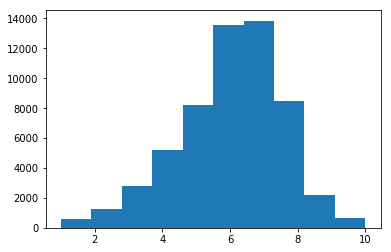

In [18]:
# Makimg HistoGram Again
plt.hist(games["average_rating"])
plt.show()

In [19]:
# Develop a corelation matrix which tells us if there are some strong corelations b/w these parameters in our dataset
cor_mat = games.corr()
fig = plt.figure(figsize = (12,9))

<Figure size 864x648 with 0 Axes>

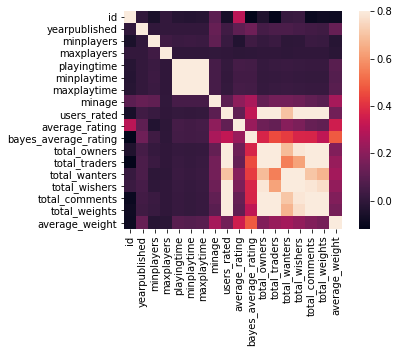

In [20]:
sns.heatmap(cor_mat, vmax = .8, square = True)
plt.show()

In [21]:
# Getting column frome dataframe
columns = games.columns.tolist()

In [22]:
# Filtering the data that we do not want (like id etc..)
columns = [c for c in columns if c not in["bayes_average_rating", "average_rating", "type", "name", "id"]] 
# Storing the variable we will predict on 

In [23]:
target = "average_rating"

In [24]:
# Generate training set
train = games.sample(frac=0.8, random_state = 1)

In [25]:
#Selecting anything not in training set and putting it in test
test = games.loc[~games.index.isin(train.index)]

In [26]:
# Printing shapes
print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


In [27]:
"""<--Importing and applying models from here-->"""

'<--Importing and applying models from here-->'

In [28]:
# Importing LinearRegression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [29]:
# Initializing Model Class
LR = LinearRegression()

In [30]:
# Fitting the Training Data with the Model
LR.fit(train[columns], train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
# Generating Predictions for our testing set
predictions = LR.predict(test[columns])

In [32]:
# Compute error b/w test predictions and actual values
mean_squared_error(predictions, test[target])

2.078819032629326

In [33]:
"""-- We found that MSE=2.078... ie greater than 0 therefore a linear model is not a good fit here 
    there fore we will now use the RandomForest Algorithm--
"""

'-- We found that MSE=2.078... ie greater than 0 therefore a linear model is not a good fit here \n    there fore we will now use the RandomForest Algorithm--\n'

In [34]:
# Importing RandomForest Model
from sklearn.ensemble import RandomForestRegressor

In [35]:
# Initializing the model
RFR = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=1)

In [36]:
# Fitting the training data
RFR.fit(train[columns], train[target])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [37]:
# Generating predictions for our test set
predictions = RFR.predict(test[columns])

In [38]:
# Compute error b/w test predictions and actual values
mean_squared_error(predictions, test[target])

1.4458560046071653

In [39]:
"""-- Now we check how accurate they are --"""
test[columns].iloc[0]

yearpublished      2011.0000
minplayers            2.0000
maxplayers            6.0000
playingtime         200.0000
minplaytime          60.0000
maxplaytime         200.0000
minage               14.0000
users_rated       15709.0000
total_owners      17611.0000
total_traders       273.0000
total_wanters      1108.0000
total_wishers      5581.0000
total_comments     3188.0000
total_weights      1486.0000
average_weight        3.6359
Name: 9, dtype: float64

In [40]:
# Make Predictions With Both Models
avg_ratings_LR = LR.predict(test[columns].iloc[0].values.reshape(1, -1))
avg_ratings_RFR = RFR.predict(test[columns].iloc[0].values.reshape(1, -1))

In [41]:
# Printing The Predictions 
print(avg_ratings_LR)
print(avg_ratings_RFR)

[8.12061283]
[7.91373581]


In [42]:
# Printing Actual Value
print(test[target].iloc[0])

8.07933
